# Cluster

Clustering dilakukan untuk mengidentifikasi pola atau kelompok serupa dari kumpulan data yang diamati. 

## K Means Clustering Algorithm

Algoritma k-means melakukan pengelompokan sejumlah k kelompok, dengan pendekatan titik data terdekat akan berkumpul sedangkan yang memiliki karakteristik data berbeda, akan membuat kelompok yang berbeda. 

Berikut tahapan dalam melakukan K-Means clustering : 



*   Menentukan jumlah cluster (kelompok), nilai K
*   Melakukan perhitungan nilai sentral (centroid) 
*   Menghitung euclidean yaitu jarak setiap titik pada nilai sentral
*   Melakukan pengelompokan setiap titik data berdasarkan jarak terdekat
*   Terus dilakukan iterasi sampai tidak ada perubahan nilai sentral







# Studi Kasus

Segmentasi Pelanggan adalah pembagian pasar ke dalam kelompok pelanggan terpisah yang memiliki karakteristik serupa. Segmentasi Pelanggan dapat menjadi sarana yang ampuh untuk mengidentifikasi kebutuhan pelanggan yang tidak terpuaskan. 

Dari data-data yang terkumpul, perusahaan dapat mengungguli persaingan dengan mengembangkan produk dan layanan yang unik dan menarik sesuai dengan karakteristik pelanggan.


Secara umum pengelompokan pelanggan dapat dilakukan dengan faktor-faktor berikut:

*   Informasi demografis, seperti jenis kelamin, usia, status keluarga dan perkawinan, pendapatan, pendidikan, dan pekerjaan.
*   Informasi geografis, yang berbeda-beda bergantung pada ruang lingkup perusahaan. Untuk bisnis yang bersifat lokal, info berkaitan dengan kota atau kabupaten tertentu. Untuk perusahaan yang lebih besar, dapat menggunakan kota pelanggan, negara bagian, atau bahkan negara tempat tinggal.
*   Psikografik, seperti kelas sosial, gaya hidup, dan ciri-ciri kepribadian.
*   Data perilaku, seperti kebiasaan belanja dan konsumsi, penggunaan produk / jasa, dan manfaat yang diinginkan.

Dari data-data yang terkumpul, perusahaan dapat mengungguli persaingan dengan mengembangkan produk dan layanan yang unik dan menarik sesuai dengan karakteristik pelanggan.




Pada studi kasus ini anda akan diberikan data pelanggan dengan informasi sebagai berikut : <br>
- Nama Pelanggan : berisi informasi nama-nama pelanggan.
- Jenis kelamin : berisi informasi jenis kelamin dari pelanggan (Pria, Wanita).
- Umur : berisi informasi usia pelanggan.
- Profesi : berisi informasi jenis profesi/pekerjaan tiap pelanggan.
- Tipe Residen : berisi informasi mengenai jenis tempat tinggal.
- NilaiBelanjaSetahun : berisi informasi total pengeluaran dalam waktu satu tahun dalam mata uang dollar.

Selanjutnya, Perusahaan ingin melihat behavior dari pelanggan dengan membaginya berdasarkan kelompok-kelompok tertentu. Bagaimana cara melakukannya ?

## Import Libraries and Data

In [1]:
# connect colab ke g drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# import package
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Package untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Membuat path untuk mengidentifikasi letak directory
# Catatan : pastikan path yang anda masukkan sesuai dengan directory data anda. Kemungkinan besar path di contoh ini berbeda dengan penyimpanan data anda
path = 'gdrive/My Drive/narasio_data/Class Division/Summer Class/Review Intermediate/Meet 4 Clustering/Data'

# Cek directory
os.listdir(path)

['customer_segments.csv']

In [4]:
# Load data
customer_data = pd.read_csv(os.path.join(path, "customer_segments.csv"))
customer_data.head()

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


Dalam melakukan machine learning, perlu diketahui terlebih dahulu apakah terdapat data kategorikal dalam data anda. Keberadaan kategori data membutuhkan 1 step tambahan dalam mengeksekusinya.

In [5]:
# Data kategori
categorical = ["Jenis Kelamin", "Profesi", "Tipe Residen"]
df_categorical = customer_data[categorical]
df_categorical.head()

,Jenis Kelamin,Profesi,Tipe Residen
0,Pria,Wiraswasta,Sector
1,Wanita,Pelajar,Cluster
2,Pria,Professional,Cluster
3,Pria,Professional,Cluster
4,Wanita,Wiraswasta,Cluster


> **Dalam materi ini, data preprocessing seperti cek missing value, duplicate data, data type tidak akan dilakukan, karena fokus dari materi adalah pada clustering. Anda dapat membuka kembali materi sebelumnya dan menerapkankan sendiri dalam materi ini jika ingin menganalisis secara lengkap.**

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) adalah proses eksplorasi data yang bertujuan untuk memahami isi dan komponen penyusun data.
<br>
<br>
**Bagaimana persebaran usia pelanggan saat ini ?**
<br>
Untuk mencari tahu distribusi usia pelanggan, anda dapat memvisualisasikannya dengan boxplot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


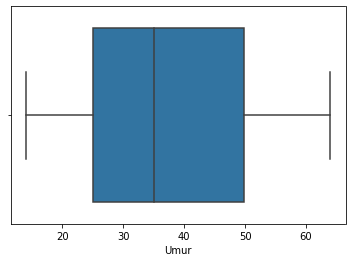

In [6]:
# Persebaran usia pelanggan
sns.boxplot(customer_data["Umur"])

Dari visualisasi diatas diketahui bahwa persebaran usia pelanggan berada pada range < 20 tahun hingga > 60 tahun.
<br>
<br>
**Bagaimana proporsi usia pelanggan?**
<br>
Cara mengetahui usia pelanggan adalah dengan membagi pelanggan kedalam kelompok-kelompok berdasarkan usianya. Dalam kasus ini kita akan membagi pelanggan dengan range usia 10 tahun pada tiap kelompok.

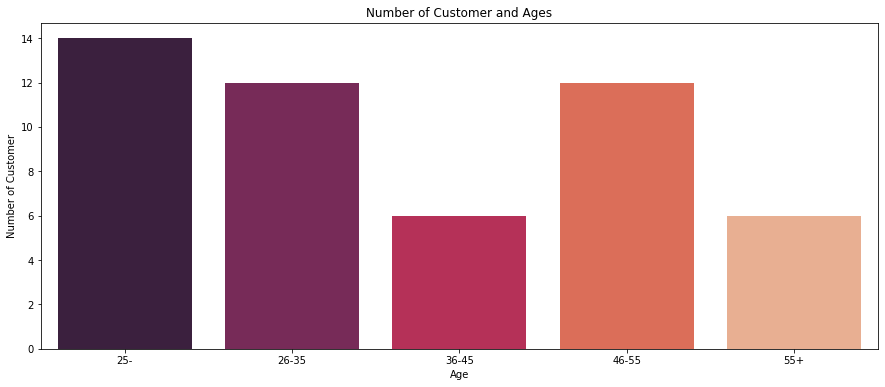

In [7]:
# Menggolongkan usia dan melihat persebarannya dalam data
age25below = customer_data.Umur[(customer_data.Umur <= 25) & (customer_data.Umur >= 12)]
age26_35 = customer_data.Umur[(customer_data.Umur <= 35) & (customer_data.Umur >= 26)]
age36_45 = customer_data.Umur[(customer_data.Umur <= 45) & (customer_data.Umur >= 36)]
age46_55 = customer_data.Umur[(customer_data.Umur <= 55) & (customer_data.Umur >= 46)]
age55above = customer_data.Umur[customer_data.Umur >= 56]

x = ["25-","26-35","36-45","46-55","55+"]
y = [len(age25below.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

Dari gambar diatas diketahui bahwa usia proporsi usia pelanggan terbanyak adalah pada kisaran usia kurang dari sama dengan 25 tahun, disusul dengan range usia 26-35 dan 46-55 tahun.
<br>
<br>
**Lalu, bagaimana dengan persebaran total belanja tiap tahunnya?**
<br>
Lakukan langkah yang sama seperti sebelumnya untuk mencari tahu persebaran total belanja pelanggan.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


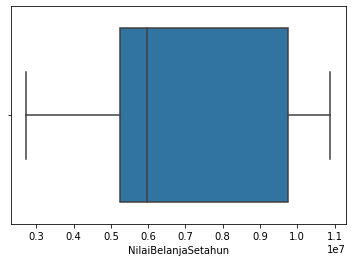

In [8]:
# Persebaran belanja selama setahun
sns.boxplot(customer_data["NilaiBelanjaSetahun"])

Rata-rata total belanja setahun adalah pada nilai 0.6 x 10^7 dollar.
<br>
<br>
**Bagaimana kondisi gender, profesi, dan tipe residen?**
<br>
Dibawah akan digunakan bar chart untuk mencari tahu proporsi tiap variabel dalam data

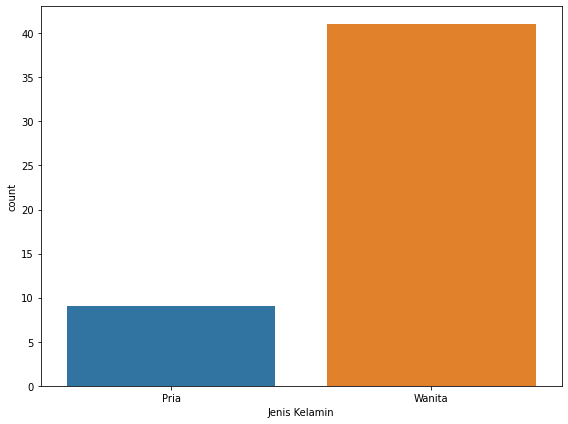

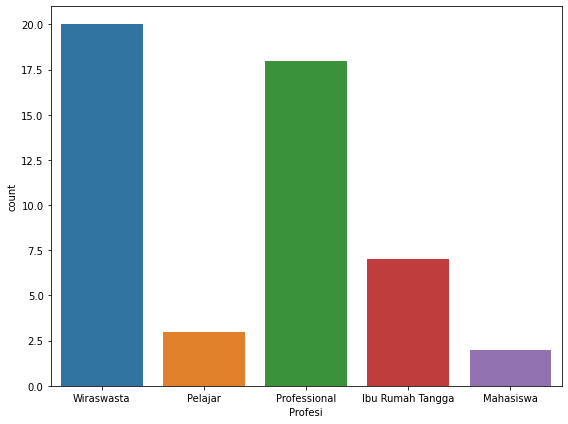

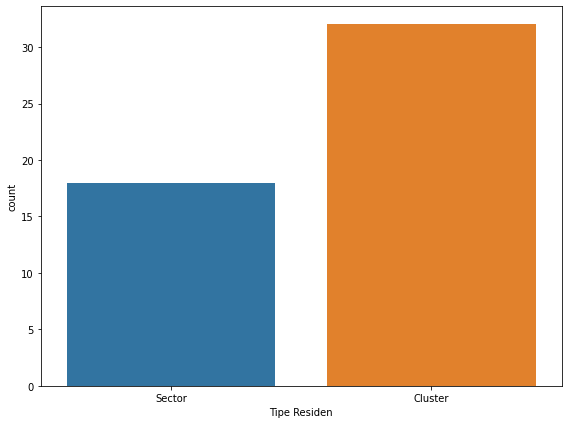

In [9]:
# Melihat perbandingan data kategori disetiap kolom
for col in categorical:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, data=customer_data)
    plt.tight_layout()

Saat ini pelanggan terbanyak adalah wanita, untuk profesi yang mendominasi adalah wiraswasta, sedangkan tipe residen yang terecord paling banyak memiliki tipe residen cluster.

## Data Preprocessing

### Encode Categorical

Pemrosesan data adalah jenis pemrosesan yang dapat mengubah data menjadi informasi yang siap digunakan dalam studi kasus. Dalam Machine Learning, anda tidak dapat langsung mengeksekusi data yang berbentuk string, oleh karena itu perlu dilakukan transformasi dari string kedalam bentuk numerik. Di python, terdapat library yang mensupport permasalahan ini, salah satunya yaitu dengan LabelEncoder() method.

In [24]:
# Merubah data kategori menjadi numerik
label_encoder = LabelEncoder()
encoded_data = customer_data[categorical].apply(label_encoder.fit_transform)

# Menggabungkan kolom umur dan nilai belanja setahun dengan data kategori
cluster_data = pd.concat([encoded_data, customer_data[["Umur", "NilaiBelanjaSetahun"]]], axis=1)

cluster_data.head()

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,1,58,9497927
1,1,2,0,14,2722700
2,0,3,0,48,5286429
3,0,3,0,53,5204498
4,1,4,0,41,10615206


Dari hasil diatas maka terlihat perubahan dimana data yang awalnya adalah string dan merupakan data kategori diubah kedalam bentuk numerik.

### Features Selection
Dalam clustering perlu diketahui juga hubungan tiap variabelnya. Hal ini akan membantu anda dalam menentukan features mana saja yang akan digunakan. Pemilihan ini dapat dicoba dengan mengalisa korelasi tiap variabel.

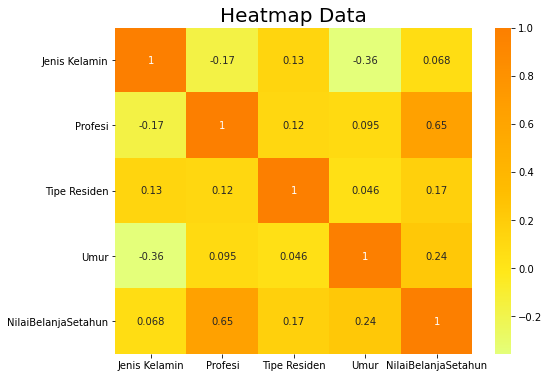

In [25]:
# Features Selection
plt.figure(figsize=(8,6))
sns.heatmap(cluster_data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap Data', fontsize = 20)
plt.show()

Dari hasil heatmap diatas diketahui bahwa korelasi terbesar dimiliki oleh variabel NilaiBelanjaSetahun dan juga Profesi, selanjutnya disusul oleh NilaiBelanjaSetahun dan Umur, akan tetapi nilainya cukup rendah. Oleh karena itu, untuk selanjutnya akan digunakan 2 variabel dalam menentukan cluster dari data, Profesi, dan NilaiBelanjaSetahun.

In [26]:
# Drop variabel yang tidak dibutuhkan
cluster_data = cluster_data.drop(["Jenis Kelamin", "Tipe Residen", "Umur"], axis = 1)
cluster_data.head()

,Profesi,NilaiBelanjaSetahun
0,4,9497927
1,2,2722700
2,3,5286429
3,3,5204498
4,4,10615206


### Scaling Data
Dalam clustering penggunaan scaling data juga diperlukan, hal ini akan membantu mengatasi permasalahan gap pada tiap kolom.

In [28]:
# Data Scaling
scaler = StandardScaler()
cluster_data[["Profesi", "NilaiBelanjaSetahun"]] = scaler.fit_transform(cluster_data[["Profesi", "NilaiBelanjaSetahun"]])
cluster_data.head()

,Profesi,NilaiBelanjaSetahun
0,0.851837,0.946763
1,-0.616847,-1.695081
2,0.117495,-0.695414
3,0.117495,-0.727361
4,0.851837,1.382421


## KMeans Cluster

Apabila anda sudah mengetahui berapa jumlah cluster yang anda harapkan, anda bisa langsung memasukkan banyaknya cluster dalam modelling yang akan anda lakukan seperti dibawah ini.

In [29]:
# Memodelkan data dengan cluster yang sudah ditentukan yaitu 2
cluster = KMeans(n_clusters=2)
cluster.fit(cluster_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
# Menambahkan kolom baru berupa hasil segmentasi pelanggan
segment = pd.Series(cluster.labels_, name="segment")

In [20]:
# Menggabungkan data awal dengan data hasil segmentasi pelanggan
pd.concat([customer_data, segment], axis=1)

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
0,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1
1,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,0
2,Agus Cahyono,Pria,48,Professional,Cluster,5286429,0
3,Antonius Winarta,Pria,53,Professional,Cluster,5204498,0
4,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,1
5,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541,0
6,"Cahyono, Agus",Pria,64,Wiraswasta,Sector,9837260,1
7,Danang Santosa,Pria,52,Professional,Cluster,5223569,0
8,Elisabeth Suryadinata,Wanita,29,Professional,Sector,5993218,0
9,Mario Setiawan,Pria,33,Professional,Cluster,5257448,0


Selanjutnya anda bisa menganalisis masing-masing karakter dari setiap segment.

### Menentukan Nilai Optimal K (kelompok)

Menentukan nilai optimal K (kelompok) dengan Metode Elbow merupakan suatu metode yang digunakan untuk menghasilkan informasi dalam menentukan jumlah cluster terbaik dengan cara melihat persentase hasil perbandingan antara jumlah cluster yang akan membentuk siku pada suatu titik. Penetapan ini didapat dari karakteristik data yang anda miliki.

In [30]:
# Perulangan ini digunakan untuk mengeksekusi nilai k dengan data 
# Selanjutkan akan dicari SSE

Sum_of_squared_error = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_data)
    Sum_of_squared_error.append(km.inertia_)

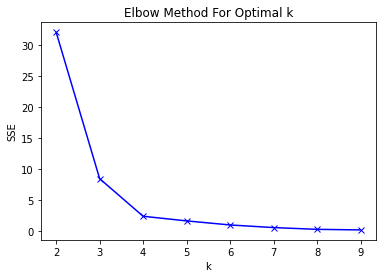

In [31]:
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

Berdasarkan metode elbow pada titik siku-siku diperoleh di k=3 atau k=4, dalam pengaplikasian metode elbow pemilihan k optimal dipilih ketika jarak antara jumlah 1 dan yang lain tidak berbeda secara signifikan. Pada kasus ini nilai k yang optimal adalah 4 dikarenakan jarak antara 2 dan 3 terlalu jauh. Namun untuk memastikan, akan dievaluasi dengan menggunakan silhouette score.

### Evaluation Model

Menggunakan silhouette score untuk konfirmasi k-kluster

In [32]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(cluster_data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(cluster_data, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.681979195097331
For n_clusters = 3, silhouette score is 0.785057992924231
For n_clusters = 4, silhouette score is 0.8491952909238699
For n_clusters = 5, silhouette score is 0.7719536764512731
For n_clusters = 6, silhouette score is 0.7912853388219153
For n_clusters = 7, silhouette score is 0.7773599784790521
For n_clusters = 8, silhouette score is 0.7964226316706623
For n_clusters = 9, silhouette score is 0.7743380058769962


Dari silhouette model didapat k-kluster yang optimum adalah 4, sama seperti pemilihan cluster dengan elbow method. Oleh karena itu, untuk kedepannya akan digunakan k=4 yang artinya customer akan dibagi kedalam 4 kelompok.

In [34]:
# Memodelkan data dengan k-means
cluster = KMeans(n_clusters=4)
cluster.fit(cluster_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
# Membuat kolom baru berdasarkan hasil clustering
segment = pd.Series(cluster.labels_, name="segment")

In [36]:
# Menggabungkan data dengan hasil cluster
results = pd.concat([customer_data, segment], axis=1)
results.head()

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
0,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,0
1,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,3
2,Agus Cahyono,Pria,48,Professional,Cluster,5286429,1
3,Antonius Winarta,Pria,53,Professional,Cluster,5204498,1
4,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,0


In [37]:
# Menampilkan 5 data teratas dari cluster 0
results[results["segment"]==0][:5]

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
0,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,0
4,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,0
6,"Cahyono, Agus",Pria,64,Wiraswasta,Sector,9837260,0
12,Cahaya Putri,Wanita,64,Wiraswasta,Cluster,9333168,0
13,Mario Setiawan,Pria,60,Wiraswasta,Cluster,9471615,0


In [38]:
# Menampilkan 5 data teratas dari cluster 1
results[results["segment"]==1][:5]

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
2,Agus Cahyono,Pria,48,Professional,Cluster,5286429,1
3,Antonius Winarta,Pria,53,Professional,Cluster,5204498,1
5,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541,1
7,Danang Santosa,Pria,52,Professional,Cluster,5223569,1
8,Elisabeth Suryadinata,Wanita,29,Professional,Sector,5993218,1


In [39]:
# Menampilkan 5 data teratas dari cluster 2
results[results["segment"]==2][:5]

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
16,Yuni Sari,Wanita,32,Ibu Rumah Tangga,Cluster,5677762,2
17,Nelly Halim,Wanita,63,Ibu Rumah Tangga,Cluster,5340690,2
27,Adeline Huang,Wanita,40,Ibu Rumah Tangga,Cluster,6631680,2
29,Rosita Saragih,Wanita,46,Ibu Rumah Tangga,Sector,5020976,2
40,Shinta Aritonang,Wanita,24,Ibu Rumah Tangga,Cluster,6820976,2


In [40]:
# Menampilkan 5 data teratas dari cluster 3
results[results["segment"]==3][:5]

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
1,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,3
19,Irene Novianto,Wanita,16,Pelajar,Sector,2896845,3
30,Eviana Handry,Wanita,19,Mahasiswa,Cluster,3042773,3
32,Cecilia Kusnadi,Wanita,19,Mahasiswa,Cluster,3047926,3
39,Irene Darmawan,Wanita,14,Pelajar,Sector,2861855,3


## EDA
Selanjutnya setelah menentukan segmentasi pelanggan akan dilakukan analisa pada masing-masing cluster. Bagaimana kondisi dari cluster 0, cluster 1, cluster 2 dan juga cluster 3.
<br>
<br>
**Bagaimana persebaran usia pada tiap cluster ?**

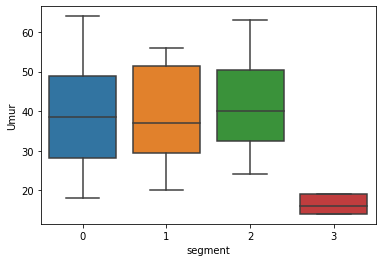

In [41]:
# Pengelompokan customer berdasarkan usia
sns.boxplot(x=results["segment"], y=results["Umur"], data=results)

Dari usia diketahui bahwa perbedaan yang laing mencolok berada di cluster 3 dimana range usia dalam cluster tersebut < 20 tahun dengan kata lain terdiri dari anak-anak muda. Sedangkan range usia yang paling bervariasi terletak pada cluster 0, sedangkan dua sisanya hampir sama, yaitu terdiri dari usia dewasa hingga manula.
<br>
<br>
**Lalu bagaimana dengan persebaran profesi pada tiap cluster?**

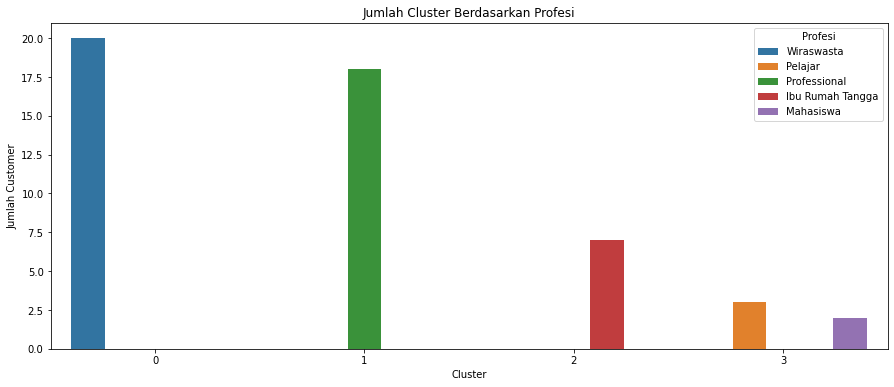

In [48]:
plt.figure(figsize=(15,6))
sns.countplot(x="segment", data=results, hue="Profesi")
plt.title("Jumlah Cluster Berdasarkan Profesi")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

Ada perbedaan yang cukup mencolok apabila dilihat dari pengaruh profesi. Dari visualisasi diatas diketahui bahwa :
- Cluster 0 : Profesi yang dominan dalam cluster ini adalah Wiraswasta, tidak ada profesi lain didalamnya. Apabila dilihat dari persebaran usia maka terdapat keterkaitan karena range usia berada di kurang dari 20 hingga 60'an tahun.
- Cluster 1 : Dalam cluster ini satu-satunya profesi adalah profesional, jika ditarik garis kembali dengan usia maka cukup masuk akal, karena persebaran usia berada di range 20 hingga < 60 tahun.
- Cluster 2 : Pada cluster ini, profesi yang tercatat adalah ibu rumah tangga.
- Cluster 3 : Berbeda dengan lainnya, dengan range usia pada cluster 3 yaitu < 20 tahun, profesi yang tercatat dalam cluster ini adalah pelajar dan mahasiswa.

Melihat analisa cluster dengan 2 variabel sebelumnya, maka akan dicari tahu **Berapa total pengeluaran pada masing-masing cluster? Apakah terdapat perbedaan yang signifikan?**

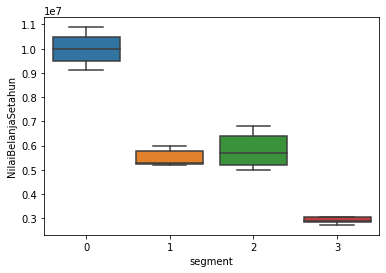

In [49]:
# Pengelompokan customer berdasarkan nilai belanja setahun
sns.boxplot(x=results["segment"], y=results["NilaiBelanjaSetahun"], data=results)

Berdasarkan Total Belanja Setahun
- Cluster 0 memiliki kecendurungan pengeluaran lebih tinggi dibanding dengan lainnya. Perbedaannya-pun cukup signifikan.
- Cluster 1 memiliki pengeluaran dikisaran $0.5 x 10^7 - 0.6 x 10^7$ dollar.
- Cluster 2 memiliki pengeluaran dikisaran $0.5 x 10^7 - 0.7 x 10^7$ dollar. Sedikit lebih tinggi dibandingkan dengan cluster 1.
- Cluster 3 memiliki pengeluaran $< 0.4 x 10^7$ dollar, paling rendah dibanding cluster lainnya.

**Visualisasi keterkaitan anatar Nilai Belanja Setahun dengan Usia**

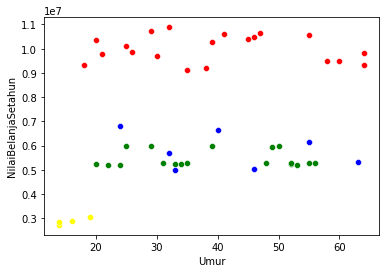

In [51]:
# Plot customer berdasarkan usia dengan menggunakan scatter plot
sns.scatterplot(x=results[results["segment"]==0].Umur, y=results[results["segment"]==0].NilaiBelanjaSetahun, color="red")
sns.scatterplot(x=results[results["segment"]==1].Umur, y=results[results["segment"]==1].NilaiBelanjaSetahun, color="green")
sns.scatterplot(x=results[results["segment"]==2].Umur, y=results[results["segment"]==2].NilaiBelanjaSetahun, color="blue")
sns.scatterplot(x=results[results["segment"]==3].Umur, y=results[results["segment"]==3].NilaiBelanjaSetahun, color="yellow")

Dari analisa yang dilakukan maka didapat informasi bahwa 
- Kelompok pertama yaitu cluster 0 merupakan kelompok dengan pengeluaran tahunan yang paling tinggi dibanding yang lainnya, oleh karena itu dapat dikatakan bahwa wiraswasta lebih konsumtif dibandingkan dengan profesi-profesi lainnya.
- Kelompok kedua yaitu cluster 1 adalah kelompok dengan profesi sebagai profesional dan memiliki pengeluaran cukup rendah dibanding orang-orang seusianya.
- Kelompok ketiga yaitu cluster 2 adalah kelompok yang memiliki penghasilan terbesar kedua, dengan melihat kembali profesi dalam kelompok ini dapat dikatakan bahwa seorang ibu rumah tangga memiliki pengeluaran yang rumayan tinggi, hal ini bisa saja dikarenakan karena keperluan rumah tangga.
- Kelompok keempat adalah kelompok yang memiliki pengeluaran paling rendah, hal ini dikarenakan kelompok ini terdiri dari pelajar dan mahasiswa dimana pengeluaran mereka masih belum terlalu banyak.
